<a href="https://colab.research.google.com/github/Shyam-Khokhariya/Machine/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 1)


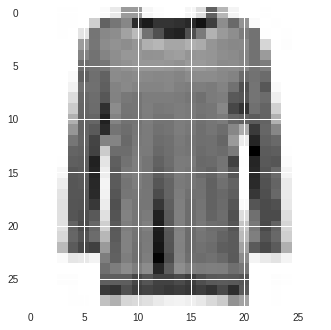

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(x_train[199])
x_train = np.expand_dims(x_train,axis=3)
print(x_train.shape)
y_train = np.expand_dims(y_train,axis=1)
print(y_train.shape)

In [0]:
def ConvNet(img):
  print(img.shape)
  conv1=tf.layers.conv2d(img,filters=8,kernel_size=[4,4],activation=tf.nn.leaky_relu, use_bias=True,padding='same',strides=[2,2])
  print(conv1.shape)
  pool1=tf.layers.max_pooling2d(conv1,pool_size=[2,2],strides=[1,1])
  print(pool1.shape)
  conv2=tf.layers.conv2d(pool1,filters=32,kernel_size=[2,2],activation=tf.nn.leaky_relu, use_bias=True,padding='same',strides=[1,1])
  print(conv2.shape)
  pool2=tf.layers.max_pooling2d(conv2,pool_size=[1,1],strides=[2,2])
  print(pool2.shape)
  conv3=tf.layers.conv2d(pool1,filters=32,kernel_size=[2,2],activation=tf.nn.leaky_relu, use_bias=True,padding='same',strides=[2,2])
  print(conv3.shape)
  pool3=tf.layers.max_pooling2d(conv2,pool_size=[2,2],strides=[2,2])
  print(pool3.shape)
  flat_img = tf.layers.flatten(pool2)
  print(flat_img.shape)
  dense1 = tf.layers.dense(flat_img,64)
  print(dense1.shape)
  dense2 = tf.layers.dense(dense1,1)
  print(dense2.shape)
  return dense2

In [5]:
x=tf.placeholder(dtype=tf.float32,shape=[None,28,28,1])
y=tf.placeholder(dtype=tf.float32,shape=[None,1])
y_pred =ConvNet(x)
error = tf.reduce_sum(tf.squared_difference(y,y_pred))
learning_rate =0.001
trainer = tf.train.AdamOptimizer(learning_rate).minimize(error)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(0,10):
    loss,_ = sess.run([error,trainer], feed_dict={x:x_train,y:y_train})
    print("Epoch: {0}, Loss: {1}".format(i,loss))

(?, 28, 28, 1)
(?, 14, 14, 8)
(?, 13, 13, 8)
(?, 13, 13, 32)
(?, 7, 7, 32)
(?, 7, 7, 32)
(?, 6, 6, 32)
(?, 1568)
(?, 64)
(?, 1)
Epoch: 0, Loss: 42667088.0
Epoch: 1, Loss: 1710415104.0
Epoch: 2, Loss: 139540128.0
Epoch: 3, Loss: 294044544.0
Epoch: 4, Loss: 812587200.0
Epoch: 5, Loss: 636660416.0
Epoch: 6, Loss: 219872528.0
Epoch: 7, Loss: 12452434.0
Epoch: 8, Loss: 82857184.0
Epoch: 9, Loss: 249241184.0
